# Jupyter Notebooks - Astronomy

This build contains several demonstrations of using Jupyter notebooks to work with and display astronomical data.

This includes rendering ??standard formats in astronomy?? and astronomical maps.

From the *Cell* menu, select *Run All*.

## Python Packages

A wide range of Python packages exist that faclitate working with astronomical datasets and rendering outputs directly in Jupyter notebooks.

## `aplpy`

The `aplypy` package ...

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
import aplpy

/srv/venv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


a floating-point value was expected. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -6.084e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.858e+01 [aplpy.core]


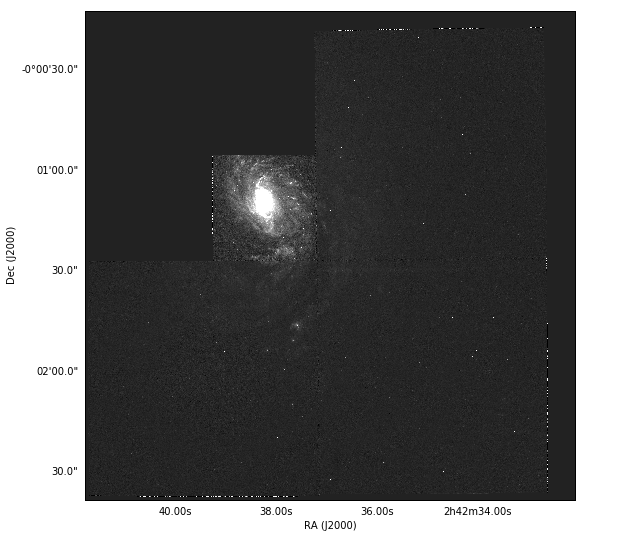

In [2]:
gc = aplpy.FITSFigure('./data/502nmos.fits')
gc.show_grayscale()

a floating-point value was expected. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -6.084e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.858e+01 [aplpy.core]


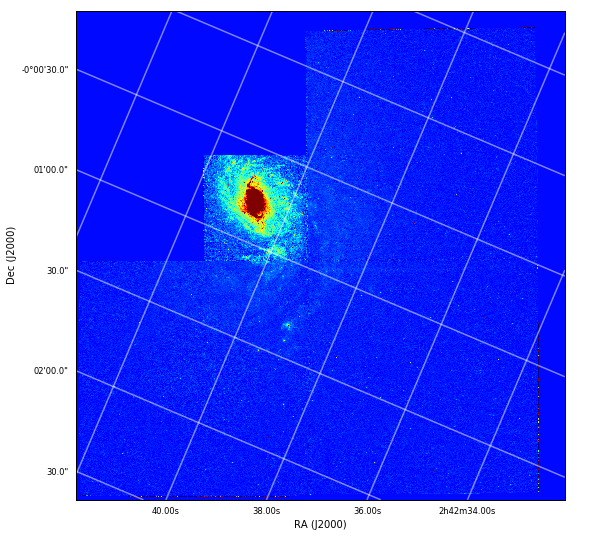

In [3]:
gc = aplpy.FITSFigure('./data/502nmos.fits')
gc.show_colorscale()
gc.add_grid()
gc.tick_labels.set_font(size='small')

## Plotting Constellations

These examples based on: https://github.com/skyfielders/astronomy-notebooks/blob/master/Plot.ipynb


### Using `pyephem`

In [23]:
%matplotlib inline
import ephem

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import numpy as np
import math

def show_map(lat_0=0,lon_0=0, width=12000000, height=8000000):
    m = Basemap(projection='aeqd', width=width, height=height,
                lat_0=lat_0, lon_0=lon_0)
    m.drawparallels(np.arange(-80,80,10))
    m.drawmeridians(np.arange(-180,180,10))

In [9]:
#Use pyephem to get the stars of the big dipper
names = ['Dubhe', 'Merak', 'Phecda', 'Megrez',
         'Alioth', 'Mizar', 'Alcor', 'Alcaid',]
stars = [ephem.star(name) for name in names]

In [25]:
#Use pyephem to plot the big dipper
def dipper_radec(year, epoch):
    for star in stars:
        star.compute(str(year), str(epoch))
    ra = [-math.degrees(star.a_ra) for star in stars]
    dec = [math.degrees(star.a_dec) for star in stars]
    return ra, dec

#Use interact to show the evolution of the big dipper over large time scale (powered by pyEphem)
@interact_manual(year=(-100000,100000,5000), epoch=(-2000,4000,1000),
         projection=['cyl','aeqd','laea','merc','stere','ortho', 'robin', 'gnom'])
def plot_dipper(year=30000, epoch=1000, projection='aeqd'):
    ra, dec = dipper_radec(year, epoch)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,epoch))
    

A Jupyter Widget

### Using `skyfield`

In [27]:
#Now calculate the big dipper using skyfield rather than pyEphem
import skyfield.data.hipparcos

#['Dubhe', 'Merak', 'Phecda', 'Megrez', 'Alioth', 'Mizar', 'Alcor', 'Alkaid',]
dipper_ids = [54061, 53910, 58001, 59774, 62956, 65378, 65477, 67301]
dipper_stars=[skyfield.data.hipparcos.get(str(x)) for x in dipper_ids]


[#################################] 100% hip_main.dat.gz


In [122]:
#Plot big dipper with skyfield
#Code updated from original demo
from skyfield.api import load
ts = load.timescale()

from skyfield.api import load
planets = load('de421.bsp')
earth = planets['earth']

In [139]:
date_utc=ts.utc(1980, 1, 1)
position = earth.at(date_utc)

print('center: ', position.center)
print('distance: ', position.distance())
print('ecliptic_latlon: ', position.ecliptic_latlon())
print('ecliptic_position: ', position.ecliptic_position())
print('from_altaz: ', position.from_altaz)
print('galactic_latlon: ', position.galactic_latlon())
print('galactic_position: ', position.galactic_position())
print('message: ', position.message)
print('observe: ', position.observe)
print('observer_data: ', position.observer_data)
print('position: ', position.position)
print('radec: ', position.radec())
print('separation from [mars]: ', position.separation_from(planets['mars'].at(date_utc)))
print('speed: ', position.speed())
print('t: ', position.t)
print('target: ', position.target)
print('velocity: ', position.velocity)

center:  0
distance:  0.98126 au
ecliptic_latlon:  (<Angle -00deg 00' 38.9">, <Angle 99deg 33' 15.8">, <Distance 0.98126 au>)
ecliptic_position:  [ -1.62873107e-01   9.67648863e-01  -1.84829045e-04] au
from_altaz:  <bound method ICRF.from_altaz of <Barycentric position and velocity at date t center=0 target=399>>
galactic_latlon:  (<Angle +08deg 15' 17.8">, <Angle 191deg 09' 53.7">, <Distance 0.98126 au>)
galactic_position:  [-0.95271455 -0.18803654  0.14088737] au
message:  None
observe:  <bound method Barycentric.observe of <Barycentric position and velocity at date t center=0 target=399>>
observer_data:  <skyfield.vectorlib.ObserverData object at 0x7f7f6e3449e8>
position:  [-0.16287311  0.88787399  0.38473904] au
radec:  (<Angle 06h 41m 34.77s>, <Angle +23deg 05' 03.8">, <Distance 0.98126 au>)
separation from [mars]:  32deg 06' 04.1"
speed:  0.01748 au/day
t:  <Time tt=2444239.500592>
target:  399
velocity:  [-0.01721258 -0.00279426 -0.0012121 ] au/day


In [84]:
def skyfield_dipper(year, projection='aeqd'):
    ra = []
    dec = []
    for star in dipper_stars:
        r,d,z = earth.at(ts.utc(year, 1, 1)).observe(star).radec()
        ra.append(r._degrees)
        dec.append(d.degrees)
    width = 4000000
    m = Basemap(width=width, height=width, projection=projection,
                lat_0=dec[3], lon_0=ra[3])
    m.drawparallels(np.arange(-80,81,10))
    m.drawmeridians(np.arange(-180,180,10))
    x, y = m(ra, dec)
    m.plot(x, y, marker='o', linestyle='--', color='b')
    plt.title('date={} epoch={}'.format(year,'2000'))

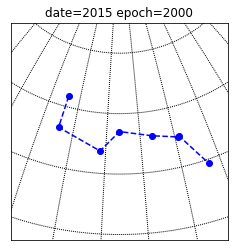

In [100]:
skyfield_dipper(2015)

## `poliastro`

[`poliastro`](http://docs.poliastro.space/en/latest/index.html) astrodynamics in Python.

6650 x 46550 km x 63.4 deg orbit around Earth (♁)


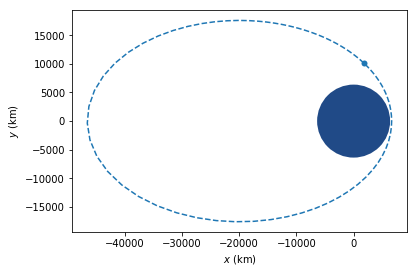

In [60]:
from poliastro.examples import molniya
from poliastro.plotting import plot

plot(molniya);
print(molniya)
#Plot of a Molniya orbit around the Earth.

In [69]:
from poliastro.plotting import plot3d
from poliastro.examples import churi

In [78]:
from IPython.display import HTML
HTML('<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>')
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

plot3d(churi);

In [77]:
from poliastro.plotting import OrbitPlotter3D
from poliastro.examples import Orbit, Earth

frame = OrbitPlotter3D()

frame.plot(churi)
frame.plot(Orbit.from_body_ephem(Earth))

frame.show();

## `astropy`

The `astropy` package ...